In [1]:
import tweepy
import pandas as pd
import time
import csv

In [2]:
# Twitter Developer Credentials
consumer_key        = "consumer_key"
consumer_secret     = "consumer_secret"
access_token        = "access_token-CcH8or6DY9BSKWLdmJMo1arIkan404"
access_token_secret = "access_token_secret"

In [3]:
# tweepy authorization 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Getting More Information From Tweets

* tweet.user.id_str = User Id of tweets author
* tweet.text = Text content of the tweet
* tweet.created_at = Date tweet was created
* tweet.user.name = Name of the user as they have defined it
* tweet.user.screen_name = Username of tweets author, commonly called user @name
* tweet.user.location = User defined location for account's profile. May be nullable
* tweet.coordinates = Geographic location as reported by user or client. May be null
* tweet.place = Place associated with the tweet where user signed up with like Plainsboro, NJ. May be null
* tweet.lang = Indicates the machine detected language of tweet text

In [4]:
# Function created to extract coordinates from tweet if it has coordinate info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below

def extract_coordinates(row):
    if row['Tweet Coordinates']:
        return row['Tweet Coordinates']['coordinates']
    else:
        return None
# Function created to extract place such as city, state or country from tweet if it has place info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None


def twitter_scraping (keyword,until):

    text_query = keyword +'-filter:retweets'
    max_tweets = 3150
    #coordinates = '42.851306,-96.127041,100mi'
    language = 'en'
    result_type = 'recent'
    until_date = '2021-05-{}'.format(until)
    since_date = '2021-05-{}'.format(until-1)


    # Creation of query method using parameters
    tweets = tweepy.Cursor(api.search,
                           q=text_query,
                           #geocode=coordinates, 
                           lang=language, 
                           result_type = result_type, 
                           until = until_date,
                           since =since_date,
                           count = 100,
                           tweet_mode='extended').items(max_tweets)
 
    # Pulling information from tweets iterable object
    # Add or remove tweet information you want in the below list comprehension
    tweets_list = [[tweet.user.id_str,
                    tweet.full_text, 
                    tweet.created_at,  
                    tweet.user.name, 
                    tweet.user.screen_name, 
                    tweet.user.location,
                    tweet.coordinates,
                    tweet.place,
                    tweet.lang] for tweet in tweets]
 
    # Creation of dataframe from tweets_list
    # Did not include column names to simplify code 
    tweets_df = pd.DataFrame(tweets_list)

    # Creation of dataframe from tweets_list
    # Add or remove columns as you remove tweet information
    tweets_df = pd.DataFrame(tweets_list,columns=['Tweet User Id', 
                                                  'Tweet Text', 
                                                  'Tweet Time',
                                                  'Tweet User Name', 
                                                  'Twitter @ Name',
                                                  'Tweet User Location',
                                                  'Tweet Coordinates', 
                                                  'Place Info', 
                                                  'Language'])
    # Function created to extract coordinates from tweet if it has coordinate info
    # Tweets tend to have null so important to run check
    # Make sure to run this cell as it is used in a lot of different functions below


    # Checks if there are coordinates attached to tweets, if so extracts them
    tweets_df['Tweet Coordinates'] = tweets_df.apply(extract_coordinates,axis=1)
 
    # Checks if there is place information available, if so extracts them
    tweets_df['Place Info'] = tweets_df.apply(extract_place,axis=1)
    print(keyword, tweets_df.shape)
    # Save tweets_df as csv file
    tweets_df.to_csv("tweets_df_{}_may{}.csv".format(keyword, until-1), index=False)
    return tweets_df

In [6]:
keywords = ["flood","flooding","floods","flooded","flood disaster","flash flood","inundated","inundation","inundating"]
until = 22
week = until - 6

#to concatenate all the tweets_df into twitter_df we have to create a twitter_df with just one line of sample data
df = pd.read_csv("tweets_df_flood_may14.csv")
twitter_df = df.head(1)
twitter_df

while until >= week:
    for keyword in keywords: 
        # Concatenating tweets_df with twitter_df
        twitter_df = pd.concat([twitter_df,twitter_scraping(keyword, until)])
        print("twitter_df", twitter_df.shape)
    until-=1
    
twitter_df.to_csv("twitter_df_may{}.csv".format(until-1), index=False)

flood (3150, 9)
twitter_df (3151, 9)
flooding (3128, 9)
twitter_df (6279, 9)
floods (1197, 9)
twitter_df (7476, 9)
flooded (2343, 9)
twitter_df (9819, 9)
flood disaster (73, 9)
twitter_df (9892, 9)
flash flood (413, 9)
twitter_df (10305, 9)
inundated (288, 9)
twitter_df (10593, 9)
inundation (19, 9)
twitter_df (10612, 9)
inundating (19, 9)
twitter_df (10631, 9)
flood (3150, 9)
twitter_df (13781, 9)


Rate limit reached. Sleeping for: 812


flooding (3150, 9)
twitter_df (16931, 9)
floods (1457, 9)
twitter_df (18388, 9)
flooded (2400, 9)
twitter_df (20788, 9)
flood disaster (56, 9)
twitter_df (20844, 9)
flash flood (929, 9)
twitter_df (21773, 9)
inundated (328, 9)
twitter_df (22101, 9)
inundation (24, 9)
twitter_df (22125, 9)
inundating (17, 9)
twitter_df (22142, 9)
flood (3150, 9)
twitter_df (25292, 9)
flooding (3150, 9)
twitter_df (28442, 9)
floods (1549, 9)
twitter_df (29991, 9)


Rate limit reached. Sleeping for: 808


flooded (3150, 9)
twitter_df (33141, 9)
flood disaster (80, 9)
twitter_df (33221, 9)
flash flood (2566, 9)
twitter_df (35787, 9)
inundated (420, 9)
twitter_df (36207, 9)
inundation (31, 9)
twitter_df (36238, 9)
inundating (9, 9)
twitter_df (36247, 9)
flood (3150, 9)
twitter_df (39397, 9)
flooding (3150, 9)
twitter_df (42547, 9)
floods (1655, 9)
twitter_df (44202, 9)
flooded (3150, 9)
twitter_df (47352, 9)
flood disaster (85, 9)
twitter_df (47437, 9)


Rate limit reached. Sleeping for: 807


flash flood (1805, 9)
twitter_df (49242, 9)
inundated (391, 9)
twitter_df (49633, 9)
inundation (26, 9)
twitter_df (49659, 9)
inundating (9, 9)
twitter_df (49668, 9)
flood (3150, 9)
twitter_df (52818, 9)
flooding (3150, 9)
twitter_df (55968, 9)
floods (1341, 9)
twitter_df (57309, 9)
flooded (3150, 9)
twitter_df (60459, 9)
flood disaster (73, 9)
twitter_df (60532, 9)
flash flood (1890, 9)
twitter_df (62422, 9)
inundated (307, 9)
twitter_df (62729, 9)
inundation (20, 9)
twitter_df (62749, 9)
inundating (14, 9)
twitter_df (62763, 9)


Rate limit reached. Sleeping for: 813


flood (3150, 9)
twitter_df (65913, 9)
flooding (3059, 9)
twitter_df (68972, 9)
floods (938, 9)
twitter_df (69910, 9)
flooded (2252, 9)
twitter_df (72162, 9)
flood disaster (54, 9)
twitter_df (72216, 9)
flash flood (1006, 9)
twitter_df (73222, 9)
inundated (274, 9)
twitter_df (73496, 9)
inundation (18, 9)
twitter_df (73514, 9)
inundating (16, 9)
twitter_df (73530, 9)
flood (3150, 9)
twitter_df (76680, 9)
flooding (2168, 9)
twitter_df (78848, 9)
floods (958, 9)
twitter_df (79806, 9)


Rate limit reached. Sleeping for: 811


flooded (1870, 9)
twitter_df (81676, 9)
flood disaster (45, 9)
twitter_df (81721, 9)
flash flood (155, 9)
twitter_df (81876, 9)
inundated (307, 9)
twitter_df (82183, 9)
inundation (18, 9)
twitter_df (82201, 9)
inundating (10, 9)
twitter_df (82211, 9)


# Understanding the Data

In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82211 entries, 0 to 9
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tweet User Id        82211 non-null  object
 1   Tweet Text           82211 non-null  object
 2   Tweet Time           82211 non-null  object
 3   Tweet User Name      82211 non-null  object
 4   Twitter @ Name       82211 non-null  object
 5   Tweet User Location  82210 non-null  object
 6   Tweet Coordinates    1193 non-null   object
 7   Place Info           2765 non-null   object
 8   Language             82211 non-null  object
dtypes: object(9)
memory usage: 6.3+ MB


In [11]:
twitter_df.head(5)

,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language
0,1225977420643217408,@caleb_efird I had to go see for myself and......,2021-05-14 23:59:40,Hayden Flood,flood_hayden,NaN,NaN,NaN,en
0,1281347225810022407,if it in the ground it will grow in food waste...,2021-05-21 23:59:56,Robert McFarland,RobertM06666153,"Marion, SC",None,"Marion, SC",en
1,3362182379,Monitoring the local river levels in Braithwai...,2021-05-21 23:59:29,CA125SY,CA125SY,"Braithwaite, England",None,None,en
2,2418108972,all the water leaving my brain to go flood my ...,2021-05-21 23:59:15,嗚呼☆,GaikotsuRamen,🇨🇵,None,None,en
3,2531338800,@ozthegoatguy Are the goats expecting a flood?...,2021-05-21 23:58:47,Old Man Dan,notsoyounggrunt,"Durham, NC",None,None,en


In [12]:
twitter_df.tail(5)

,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language
5,281874053,@NatashaEmmCee Hahaha - I’m potentially more l...,2021-05-15 17:47:53,Julie Rohr ( ͡° ͜ʖ ͡ °),JulieRohrYEG,Edmonton,None,None,en
6,198183205,inundating myself with iced coffee then forcin...,2021-05-15 15:24:51,⚡,electrobussy,"houston, tx",None,None,en
7,44720605,@StalFithrildi @Jessthelefty Absolutely love t...,2021-05-15 13:32:23,wuduadamandeveit #socialist #Ilovemyltn -🤬,megbenitez,"London, England",None,None,en
8,894714130187399168,@segamstim Right room. Every gaming chair shou...,2021-05-15 08:48:26,Ravens everywhere,cape_company,"Ontario, Canada",None,None,en
9,253682518,@NCISNewOrleans Maybe we can save this show fr...,2021-05-15 05:16:47,JB,Dadsspook57,United States,None,None,en


In [14]:
# assigning each tweet text a lenght
twitter_df['Lenght'] = twitter_df["Tweet Text"].apply(len)

In [15]:
twitter_df.head(5)

,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Lenght
0,1225977420643217408,@caleb_efird I had to go see for myself and......,2021-05-14 23:59:40,Hayden Flood,flood_hayden,NaN,NaN,NaN,en,85
0,1281347225810022407,if it in the ground it will grow in food waste...,2021-05-21 23:59:56,Robert McFarland,RobertM06666153,"Marion, SC",None,"Marion, SC",en,271
1,3362182379,Monitoring the local river levels in Braithwai...,2021-05-21 23:59:29,CA125SY,CA125SY,"Braithwaite, England",None,None,en,113
2,2418108972,all the water leaving my brain to go flood my ...,2021-05-21 23:59:15,嗚呼☆,GaikotsuRamen,🇨🇵,None,None,en,52
3,2531338800,@ozthegoatguy Are the goats expecting a flood?...,2021-05-21 23:58:47,Old Man Dan,notsoyounggrunt,"Durham, NC",None,None,en,88


In [16]:
twitter_df.describe()

,Lenght
count,82211.000000
mean,171.698325
std,86.846211
min,5.000000
25%,102.000000
50%,161.000000
75%,248.000000
max,980.000000


In [22]:
# Min lenght tweet text
twitter_df['Tweet Text'][twitter_df["Lenght"]==5].iloc[0]

'flood'

In [23]:
# Max lenght tweet text
twitter_df['Tweet Text'][twitter_df["Lenght"]==980].iloc[0]

"@KerridwinR @Sicut_Lupus @NickSoutter @brad_feinman @ChadCottle @imkimaaron @PG13ScottWatson @AnthonyT2_Mufc @TJMair @mirandaisrisen @gimmesomeloki @RealRaviolius @Friendof_Darwin @svensrevenge @Melanie33720945 @WmManry @1stthes521 @TheGod_Particle @LustfulLiberal @ThinkyTexan @IngridIngwah @JaTapps @JerryHelton14 @Catheri77148739 @Tsunami_64 @bumpus_lumpus @AprilLigeia @DrLazerKitty @CivilLost @mirandahasrisen @th1rt3en_TM @NuckChorris16 @AtlanticCanuck @Chrono52 @CharlesHenryLe3 @domenictiso4 @RossGilroy @RealAnonDouche @InTimeShow @debbiepalm44 @SlsStudios @Dylon59556561 @NoScienceDenial @DeanPHanley @SariellaHerself @MrAnder09064048 @ShadeyShroomy @Janetb172 @Bootyju18047095 @mirandadied4u No this surge we're seeing today is due to one thing Biden's change in policies reversing Trump's policies which had illegal border crossing at all time low levels. But as soon as Biden issues his Executive Orders undoing Trump's Executive Orders flood gates of illegal started"

In [24]:
# Random lenght tweet text
twitter_df['Tweet Text'][twitter_df["Lenght"]==358].iloc[0]

'@IHateGod427 @Simple_Shaman @Friendof_Darwin @AlagbaKenneth @TakeThatDarwin @spanna65 @GregCampNC @blowave @ScientiaPercept @ei9iw @Call_Me_Emo1 @DepresdHumanist @thefernist @SethJMoore @_CROPES_ @Mogleeone It’s not about the “arguments.” A global flood is a scientific impossibility. The rock strata shows dry land features. I learned this from a geologist.'

# Let's build a WordCloud and check to most frequently used words in tweet texts.

In [25]:
# Let's get all the texts into a sentences list
sentences = twitter_df['Tweet Text'].tolist()
len(sentences)

82211

In [26]:
#Let's join all of the words in the sentences list into a one string
sentences_as_one_string =''.join(sentences)
len(sentences_as_one_string)

14115491

# WordCloud for all tweet texts

In [49]:
#!pip install wordcloud

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

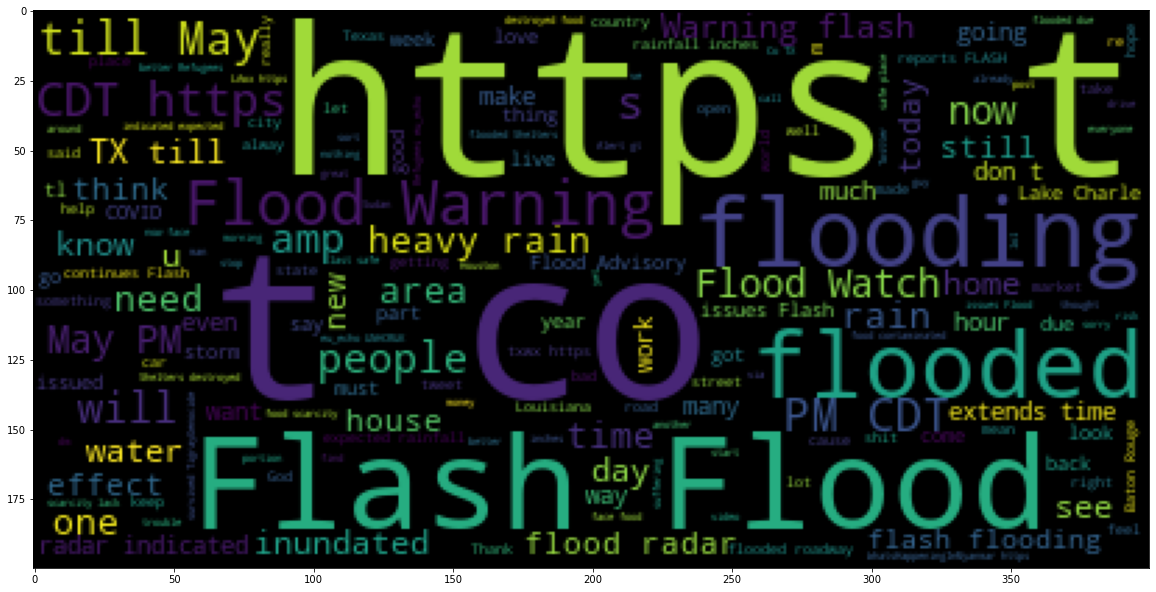

In [29]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

* As you can see from the wordcloud image, the most frequent text is 'https' and 't co' tweet texts needs to be cleaned to get the really important and most frequent words from the tweet text corpus.

# Let's Clean the tweet texts and check WordCloud again

# Remove Punctuations from the texts

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
Test = "Hello Guys, It's nice to be here with you!!::))"
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'G',
 'u',
 'y',
 's',
 ' ',
 'I',
 't',
 's',
 ' ',
 'n',
 'i',
 'c',
 'e',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'y',
 'o',
 'u']

In [32]:
#Let's join the character again to form the string
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Guys Its nice to be here with you'

# Remove Stopwords

In [33]:
import nltk #Natural Language Tool Kit

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/hilmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# We have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:

Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() 
                                if word.lower() not in stopwords.words('english')]

In [37]:
Test_punc_removed_join_clean # Only importand and no so common words are left

['Hello', 'Guys', 'nice']

# Define a pipeline to clean the text corpus

In [38]:
# Let's define a pipeline to clean up all the texts 

# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def review_cleaning (review):
    review_punc_removed = [char for char in review if char not in string.punctuation]
    review_punc_removed_join = ''.join(review_punc_removed)
    review_punc_removed_clean = [word for word in review_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return review_punc_removed_clean

In [39]:
twitter_df['Cleaned_Text'] = twitter_df['Tweet Text'].apply(review_cleaning)

In [47]:
twitter_df['Cleaned_Text'].iloc[3]# show the cleaned up version

['water', 'leaving', 'brain', 'go', 'flood', 'puss']

In [48]:
#let's check out the original text
twitter_df['Tweet Text'].iloc[3]

'all the water leaving my brain to go flood my puss--'

In [58]:
# Let's get all the reviews into a sentences list
sentences = twitter_df['Cleaned_Text'].apply(' '.join)
len(sentences)

82211

In [59]:
sentences

0    calebefird go see andit gets worse httpstcoiEB...
0    ground grow food waste staying Waste plants fl...
1    Monitoring local river levels Braithwaite floo...
2                    water leaving brain go flood puss
3    ozthegoatguy goats expecting flood headed high...
                           ...                        
5    NatashaEmmCee Hahaha I’m potentially likely ge...
6    inundating iced coffee forcing go shopping irl...
7    StalFithrildi Jessthelefty Absolutely love rec...
8    segamstim Right room Every gaming chair ears 😉...
9    NCISNewOrleans Maybe save show cancellation in...
Name: Cleaned_Text, Length: 82211, dtype: object

In [60]:
#Let's join all the reviews and words in the sentences list into a one string
sentences_as_one_string =''.join(sentences)
len(sentences_as_one_string)

10411239

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

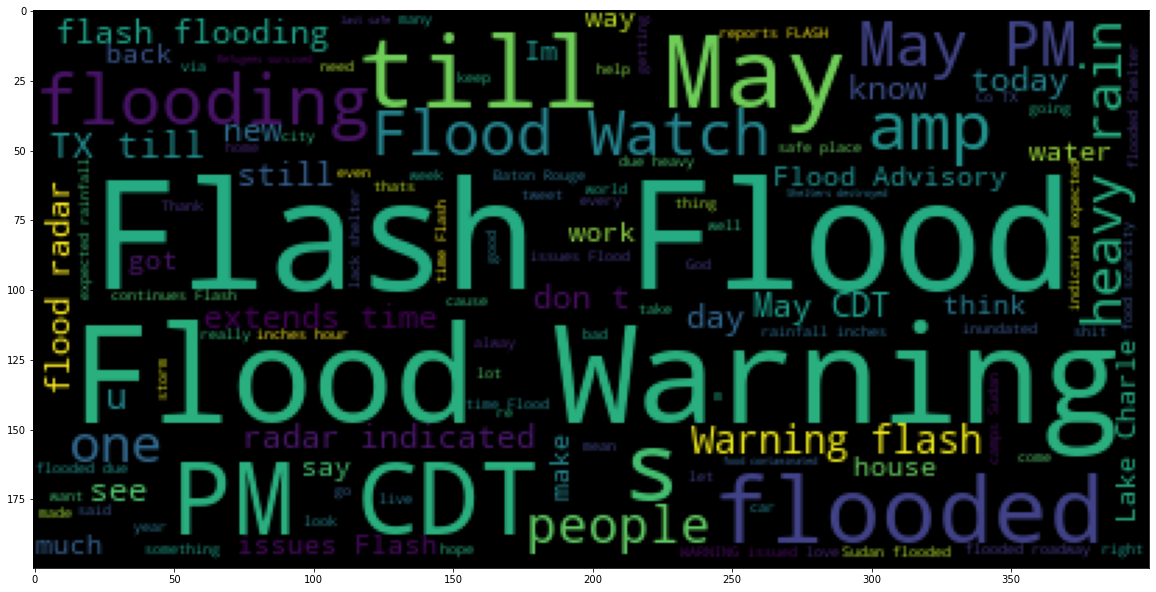

In [61]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

* Most Frequent Words and word pairs from the wordcloud:
   * Flood Warning
   * Flash Flood
   * flash flooding
   * Flood Watch
   * flooded
   * flooding
   * heavy rain
   * flood radar
   * Warning flash
   * Flood Advisory
   * Lake Charlie
   * TX- Texas
   * issues flash
   * water
   
   

In [90]:
from collections import Counter 

# split() returns list of all the words in the string
split_it = sentences_as_one_string.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_frequent = Counter.most_common(50)
  
print(most_frequent)

[('flooding', 19075), ('flood', 17862), ('flooded', 16928), ('Flood', 13992), ('floods', 7395), ('Warning', 7341), ('CDT', 7254), ('May', 6779), ('Flash', 6329), ('amp', 6221), ('PM', 6013), ('flash', 5883), ('rain', 5782), ('till', 5221), ('TX', 4911), ('like', 4412), ('people', 4282), ('time', 3943), ('water', 3559), ('get', 3534), ('Watch', 2771), ('area', 2727), ('one', 2619), ('FLOOD', 2612), ('areas', 2604), ('need', 2547), ('heavy', 2529), ('continues', 2423), ('County', 2382), ('issues', 2301), ('last', 2287), ('inundated', 2198), ('weather', 2197), ('19', 2183), ('back', 2172), ('Texas', 2074), ('LA', 2048), ('would', 2042), ('issued', 2026), ('due', 2000), ('see', 1970), ('know', 1962), ('radar', 1949), ('also', 1948), ('still', 1944), ('rainfall', 1934), ('today', 1914), ('dont', 1902), ('2', 1888), ('1', 1886)]


In [91]:
for i in most_frequent:
    print(i)

('flooding', 19075)
('flood', 17862)
('flooded', 16928)
('Flood', 13992)
('floods', 7395)
('Warning', 7341)
('CDT', 7254)
('May', 6779)
('Flash', 6329)
('amp', 6221)
('PM', 6013)
('flash', 5883)
('rain', 5782)
('till', 5221)
('TX', 4911)
('like', 4412)
('people', 4282)
('time', 3943)
('water', 3559)
('get', 3534)
('Watch', 2771)
('area', 2727)
('one', 2619)
('FLOOD', 2612)
('areas', 2604)
('need', 2547)
('heavy', 2529)
('continues', 2423)
('County', 2382)
('issues', 2301)
('last', 2287)
('inundated', 2198)
('weather', 2197)
('19', 2183)
('back', 2172)
('Texas', 2074)
('LA', 2048)
('would', 2042)
('issued', 2026)
('due', 2000)
('see', 1970)
('know', 1962)
('radar', 1949)
('also', 1948)
('still', 1944)
('rainfall', 1934)
('today', 1914)
('dont', 1902)
('2', 1888)
('1', 1886)
